# Lab.1: Framework
## Introduction to Human Language Technologies
### Victor Badenas Crespo

***

First the necessary libraries are imported and the TOP_N wanted values defined

In [ ]:
import nltk
from nltk.text import Text
from string import punctuation
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('gutenberg')
nltk.download('stopwords')
TOP_N = 25

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Then the text file and the stopwords_set are loaded from nltk

In [ ]:
# load file and stopwords
txt_data = nltk.corpus.gutenberg.words('blake-poems.txt')
stopwords_set = stopwords.words('english')

The file includes a header that is comprised between [] so, if the file has a ] word, the brackets and the text in between is removed, as it means nothing for the analysis of the file as it was not written by the poem's author

In [ ]:
# the file has a header comprised between [] so we can filter it as it has no relevant meaning
if ']' in txt_data:
    txt_data = txt_data[txt_data.index(']')+1:]

Then the titles of the poems are filtered as they contain redundant information from the poems' meaning

In [ ]:
# the file also has a title for each poem which is fully capitalised and should not be counted
txt_data = Text(filter(lambda word: not all(char.isupper() for char in word), txt_data))

This cell has the necessary code to convert every word to lowercase. However it is commented and furthermore not used as it has been tested that without this conversion, the result fits zipf's law better.

In [ ]:
# convert all words to lowercase (the lowercase conversion was removed as it fit with zipf's law better)
# txt_data = Text(map(lambda word: word.lower(), txt_data))

This cell contains the necessary code to remove all stopwords in the list

In [ ]:
# remove all words in stopwords_set
filtered_data = list(filter(lambda word: word.lower() not in stopwords_set, txt_data))

The next cell makes use of the string translate method and translation table object as it generates a translation table that replaces all punctuation objects to empty strings, thus deleting them. It also filters the empty words that the process may generate.

In [ ]:
def remove_punctuation(word):
    # removes all punctuation symbols in string.punctuation in word
    return word.translate(str.maketrans('', '', punctuation))

# apply the remove_punctuation function to all the words in the file and remove empty words
filtered_data = [word for word in map(remove_punctuation, filtered_data) if word]

Using python's Counter object, the top n words are extracted from thge list

In [ ]:
counter = Counter(filtered_data)
top_n = counter.most_common(TOP_N)

Simple prints and plots of the result

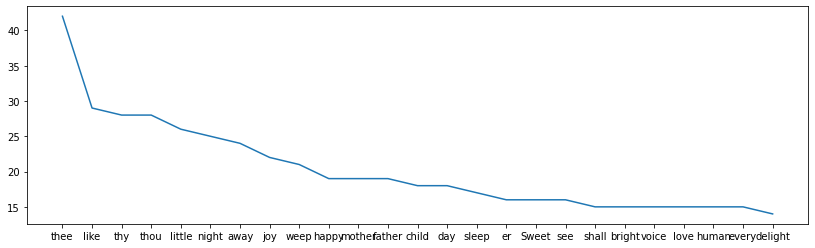

In [ ]:
words = [word for word, _ in top_n]
nums = [num for _, num in top_n]
plt.figure(figsize=(14, 4))
plt.plot(words, nums)
plt.show()

In [ ]:
print(f"Top {TOP_N} words in file:")
print(top_n)

Top 25 words in file:
[('thee', 42), ('like', 29), ('thy', 28), ('thou', 28), ('little', 26), ('night', 25), ('away', 24), ('joy', 22), ('weep', 21), ('happy', 19), ('mother', 19), ('father', 19), ('child', 18), ('day', 18), ('sleep', 17), ('er', 16), ('Sweet', 16), ('see', 16), ('shall', 15), ('bright', 15), ('voice', 15), ('love', 15), ('human', 15), ('every', 15), ('delight', 14)]


## Test with lowercase transform

This is all duplicate code from the cells above, however it is executed for demostrative purposes

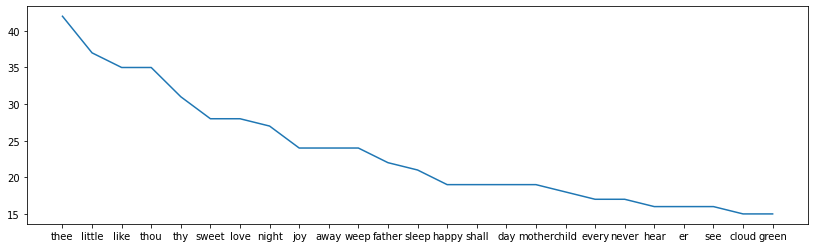

[('thee', 42), ('little', 37), ('like', 35), ('thou', 35), ('thy', 31), ('sweet', 28), ('love', 28), ('night', 27), ('joy', 24), ('away', 24), ('weep', 24), ('father', 22), ('sleep', 21), ('happy', 19), ('shall', 19), ('day', 19), ('mother', 19), ('child', 18), ('every', 17), ('never', 17), ('hear', 16), ('er', 16), ('see', 16), ('cloud', 15), ('green', 15)]


In [ ]:
txt_data_lower = nltk.corpus.gutenberg.words('blake-poems.txt')
txt_data_lower = Text(filter(lambda word: not all(char.isupper() for char in word), txt_data_lower))
txt_data_lower = Text(map(lambda word: word.lower(), txt_data_lower))
filtered_data_lower = list(filter(lambda word: word not in stopwords_set, txt_data_lower))
filtered_data_lower = [word for word in map(remove_punctuation, filtered_data_lower) if word]
counter_lower = Counter(filtered_data_lower)
top_n_lower = counter_lower.most_common(TOP_N)
plt.figure(figsize=(14, 4))
plt.plot([word for word, _ in top_n_lower], [num for _, num in top_n_lower])
plt.show()
print(top_n_lower)

***

## Conclusions

After trying both approaches, the best one is the one where the words are not converted to lowercase as it fits more with zipf's law which approximates the histogram distribution of words to:

$$f(k;N,s) = \frac{1/ k^{s}}{\sum_{n=1}^{N} 1/ n^{s}}$$

where k is the rank, s is the exponent caracterizing the exponential distribution and N is the number of elements. For that matter and that it follows approximately a hyperbolic decay, the non lowercased result was chosen.

[42 29 28 28 26 25 24 22 21 19 19 19 18 18 17 16 16 16 15 15 15 15 15 15
 14] [42 37 35 35 31 28 28 27 24 24 24 22 21 19 19 19 19 18 17 17 16 16 16 15
 15]


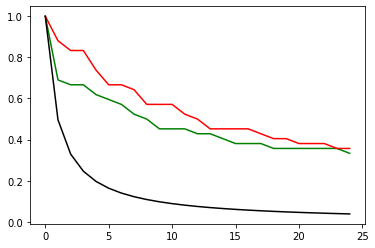

In [ ]:
import numpy as np
class ZIPF:
  def __init__(self, N, s):
    self.N = N
    self.s = s
    self.den = sum(map(lambda n: 1/(n**s), range(1, N+1)))
  
  def __call__(self, k):
    num = 1 / (k**self.s)
    return num/self.den

word_counts = np.array([num for _, num in top_n])
word_counts_lower = np.array([num for _, num in top_n_lower])
word_counts = word_counts / max(word_counts)
word_counts_lower = word_counts_lower / max(word_counts_lower)

zipf = ZIPF(len(counter), 1.01)
zipf_pdf = [zipf(i) for i in range(1, len(top_n)+1)]
zipf_pdf = list(map(lambda x: x/max(zipf_pdf), zipf_pdf))

plt.plot(word_counts, color='g')
plt.plot(word_counts_lower, color='r')
plt.plot(zipf_pdf, color='k')
plt.show()

The above cell shows how the green line resembles more (even if not quite the same) to the black than the red.

***

### End of P1